#IMPORTANTO BIBLIOTECAS

In [ ]:
!pip install riskfolio-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 27.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp
import seaborn as sns
sns.set()

warnings.filterwarnings("ignore")
#pd.options.display.float_format = '{:.4%}'.format

#DADOS

In [ ]:
precos_acoes = pd.read_excel('/content/agora.xlsx', sheet_name = 0)
precos_acoes.rename(columns = {'Dia útil': 'du'}, inplace = True)
precos_acoes

,Ano,du,BANC,LMAG,RETC,DRWH,AQSA,SMAQ,PETN,ETF Defensivo,Índice Bolsa EW (pontos),Índice Bolsa VW (pontos),Valor do Contrato Futuro em $ (Posição Comprada),Valor do Contrato Futuro em $ (Posição Vendida)
0,-1,1,9.350164,9.319664,9.293680,9.233610,9.380863,8.920607,8.771930,100.000000,100.000000,100.000000,1000.000000,1000.000000
1,0,2,9.455677,9.500023,9.435111,9.433386,9.414986,9.126576,9.146473,101.487520,101.955933,102.400019,998.852777,1001.147223
2,0,3,9.425878,9.475236,9.345454,9.342602,9.389532,9.070888,9.109198,100.980691,101.405490,101.933366,997.346972,1002.653028
3,0,4,9.351638,9.431521,9.303607,9.308788,9.310088,8.967938,8.999259,100.419978,100.643522,101.089120,988.159780,1011.840220
4,0,5,9.492233,9.505903,9.390343,9.445942,9.415790,9.136298,9.235453,101.556741,102.133116,102.787839,999.357975,1000.642025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,5,1509,13.747470,13.720207,13.456485,14.321896,13.158863,14.439399,13.540586,147.450252,150.856776,150.505783,1012.396848,987.603152
1509,5,1510,13.601090,13.699914,13.373288,14.206691,13.077378,14.064247,13.461451,146.679168,149.430663,149.349956,1007.645865,992.354135
1510,5,1511,13.599419,13.795362,13.400121,14.328454,13.105467,14.114420,13.654085,147.545732,150.231337,150.464221,1009.516149,990.483851
1511,5,1512,13.598019,13.806793,13.329730,14.357864,13.049893,14.076437,13.591218,147.481954,149.926537,150.160389,1006.180474,993.819526


In [ ]:
precos_rf = pd.read_excel('/content/agora.xlsx', sheet_name = 1)
precos_rf.rename(columns = {'Dia útil': 'du'}, inplace = True)
precos_rf

,Ano,du,Renda Fixa - CP,Renda Fixa - LP
0,-1,1,96618.3575%,92902.1687%
1,0,2,97407.2130%,93679.8167%
2,0,3,96845.8336%,92993.6106%
3,0,4,97448.5460%,93400.3855%
4,0,5,96913.8923%,92658.6052%
...,...,...,...,...
1007,3,1008,99746.1279%,96286.6107%
1008,3,1009,99811.7763%,96633.5769%
1009,3,1010,99901.1680%,96641.8874%
1010,3,1011,99897.7154%,96657.5298%


In [ ]:
precos = pd.merge(precos_acoes, precos_rf, on='du', how='outer')#Df de ações + renda fixa.
                                                                #Problema que rf tem 3 dias a mais.
precos

,Ano_x,du,BANC,LMAG,RETC,DRWH,AQSA,SMAQ,PETN,ETF Defensivo,Índice Bolsa EW (pontos),Índice Bolsa VW (pontos),Valor do Contrato Futuro em $ (Posição Comprada),Valor do Contrato Futuro em $ (Posição Vendida),Ano_y,Renda Fixa - CP,Renda Fixa - LP
0,-100.0000%,1,935.0164%,931.9664%,929.3680%,923.3610%,938.0863%,892.0607%,877.1930%,10000.0000%,10000.0000%,10000.0000%,100000.0000%,100000.0000%,-1,96618.3575%,92902.1687%
1,0.0000%,2,945.5677%,950.0023%,943.5111%,943.3386%,941.4986%,912.6576%,914.6473%,10148.7520%,10195.5933%,10240.0019%,99885.2777%,100114.7223%,0,97407.2130%,93679.8167%
2,0.0000%,3,942.5878%,947.5236%,934.5454%,934.2602%,938.9532%,907.0888%,910.9198%,10098.0691%,10140.5490%,10193.3366%,99734.6972%,100265.3028%,0,96845.8336%,92993.6106%
3,0.0000%,4,935.1638%,943.1521%,930.3607%,930.8788%,931.0088%,896.7938%,899.9259%,10041.9978%,10064.3522%,10108.9120%,98815.9780%,101184.0220%,0,97448.5460%,93400.3855%
4,0.0000%,5,949.2233%,950.5903%,939.0343%,944.5942%,941.5790%,913.6298%,923.5453%,10155.6741%,10213.3116%,10278.7839%,99935.7975%,100064.2025%,0,96913.8923%,92658.6052%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,300.0000%,1008,1237.8858%,1240.8109%,1234.3172%,1291.6766%,1188.6577%,1387.5424%,1474.5185%,13317.3726%,14078.1472%,14565.0891%,102511.6990%,97488.3010%,3,99746.1279%,96286.6107%
1008,300.0000%,1009,1243.7879%,1242.2957%,1246.6790%,1299.3515%,1199.2820%,1398.2093%,1479.0108%,13388.5806%,14161.4083%,14631.2594%,103050.0000%,96950.0000%,3,99811.7763%,96633.5769%
1009,NaN,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,99901.1680%,96641.8874%
1010,NaN,1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,99897.7154%,96657.5298%


##Dataframe de retornos

In [ ]:
ativos = ['BANC',
          'RETC',
          'DRWH',
          'AQSA',
          'PETN',]
retornos = precos_acoes[ativos].pct_change().dropna()#df de retornos. Problema que os ultimos 3 dias das ações
                                               #deram retorno 0
#retornos = retornos.replace(0.0000, np.nan)#substitui retorno 0 por NA, supondo que houve algum tipo de variação
                                           #de preços todos os dias, caso contrário achar outra solução.
                                           #quebra o otimização, por alguma razão ainda desconhecida.
retornos

,BANC,RETC,DRWH,AQSA,PETN
1,0.011285,0.015218,0.021636,0.003638,0.042698
2,-0.003151,-0.009503,-0.009624,-0.002704,-0.004075
3,-0.007876,-0.004478,-0.003619,-0.008461,-0.012069
4,0.015034,0.009323,0.014734,0.011354,0.026246
5,-0.007784,0.000374,-0.003044,-0.001137,0.001104
...,...,...,...,...,...
1508,-0.002076,-0.001877,0.002949,0.000022,-0.008621
1509,-0.010648,-0.006183,-0.008044,-0.006192,-0.005844
1510,-0.000123,0.002006,0.008571,0.002148,0.014310
1511,-0.000103,-0.005253,0.002053,-0.004241,-0.004604


#HRP

##Cluster dos ativos

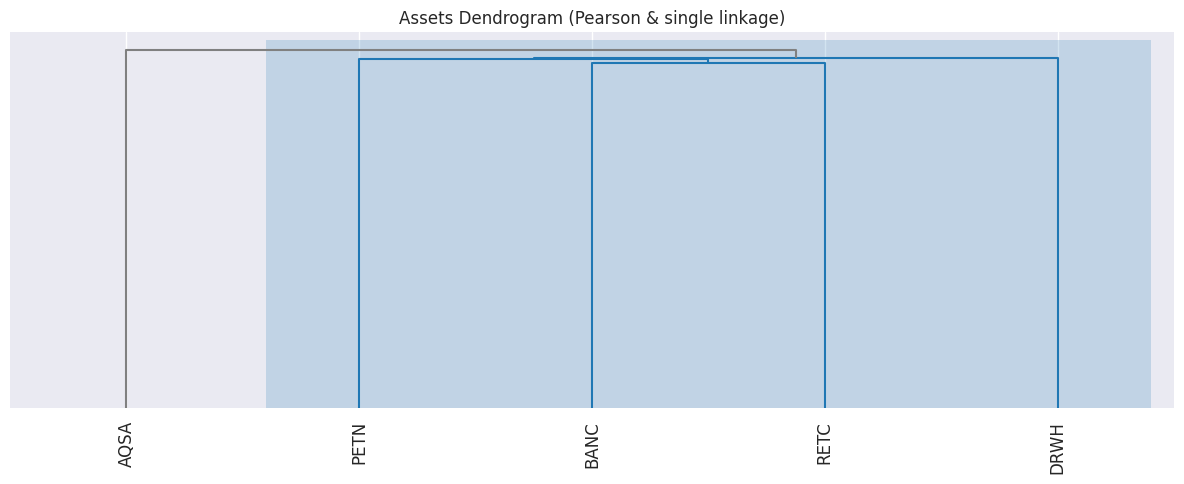

In [ ]:
# Plota os Cluster dos ativos
ax = rp.plot_dendrogram(returns = retornos,
                        codependence = 'pearson',
                        linkage = 'single',
                        k = None,
                        max_k = 10,
                        leaf_order = True,
                        ax = None)

##Calculando portfólio

In [ ]:
# Construindo o objeto do Portfólio
port = rp.HCPortfolio(returns = retornos)

# Estimando o portfólio ótimo
model = 'HRP'  # Pode ser HRP ou HERC
codependence = 'pearson'  # Matriz de correlação usada para agrupar ativos em clusters
rm = 'MV'  # Medida de risco utilizada, neste caso, será a variância
rf = (1+.0405)**(1/252)-1  # Taxa livre de risco
linkage = 'single'  # Método de ligação usado para construir clusters
max_k = 10  # Número máximo de clusters usado em duas diferenças estatísticas de lacuna, apenas para o modelo HERC
leaf_order = True  # Considerar ordem ótima das folhas no dendrograma

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,BANC,RETC,DRWH,AQSA,PETN
weights,0.278847,0.173307,0.134179,0.333351,0.080316


##Plot da composição do portfolio

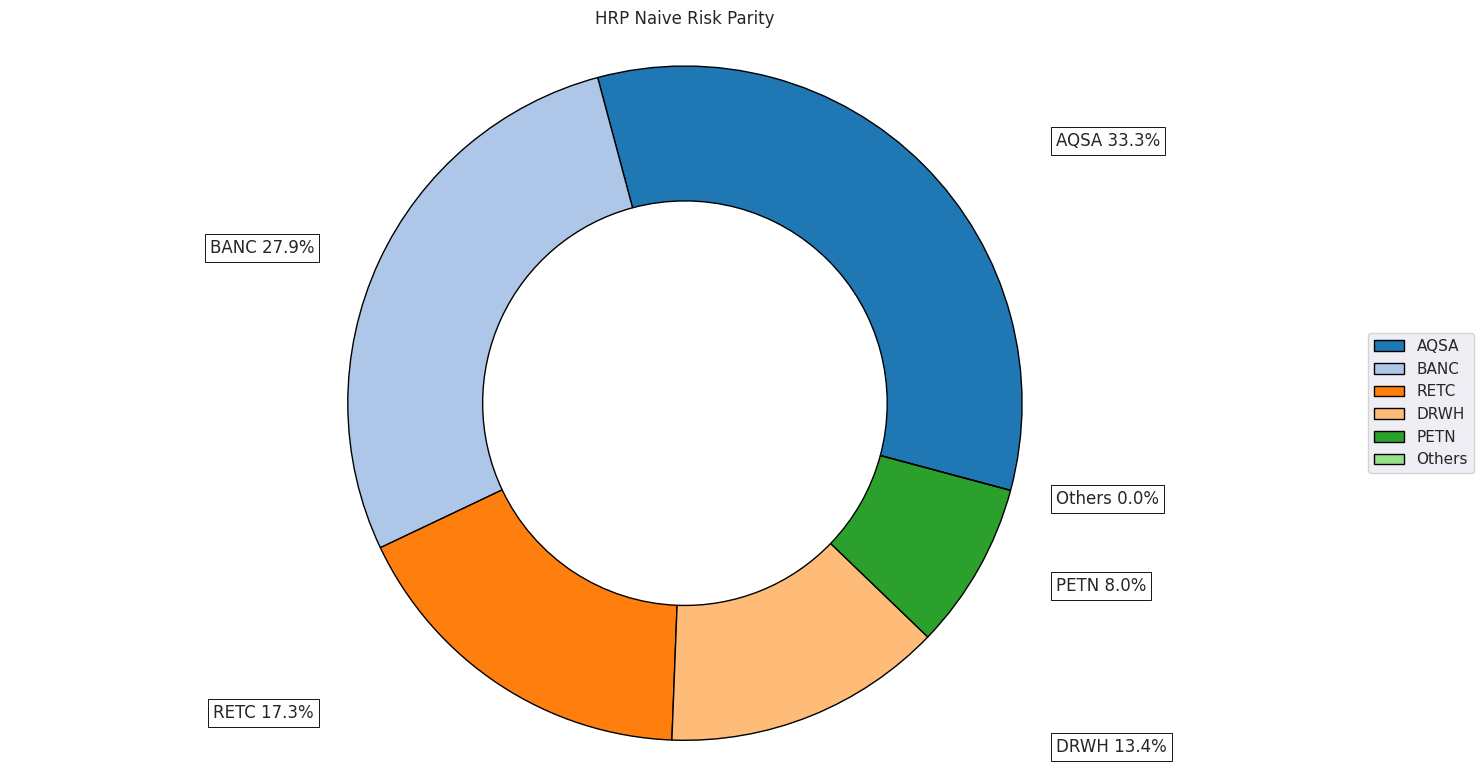

In [ ]:
bx = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=15,
                 ax=None)

##Contribuição do risco

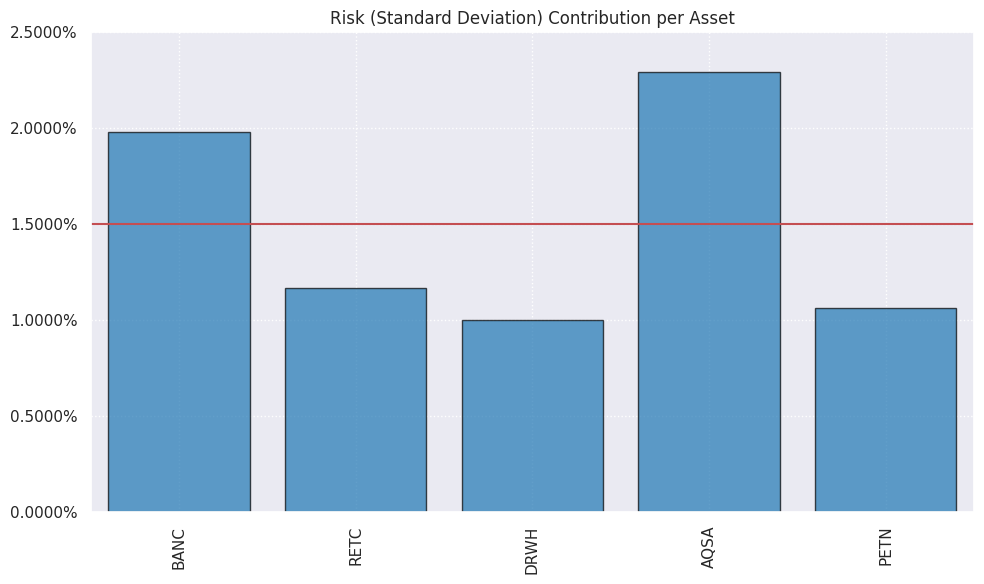

In [ ]:
# Plotando a contribuição de risco por ativo

# média dos retornos
mu = retornos.mean()

# covariância dos retornos
cov = retornos.cov()

# plota a contribuição (anualizada)
ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=retornos,
                      rm=rm,
                      rf=rf,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)